# Checking if the roulette wheel is fair
We would expect that the spins would form a uniform distribution. We can check this by using a chi-squared test.

In [1]:
from roulette import Roulette
import matplotlib.pyplot as plt  # type: ignore
import numpy as np

roulette = Roulette()

In [2]:
nums = [0] * 37
for i in range(3000000):
    num = roulette.spin()
    nums[num] += 1

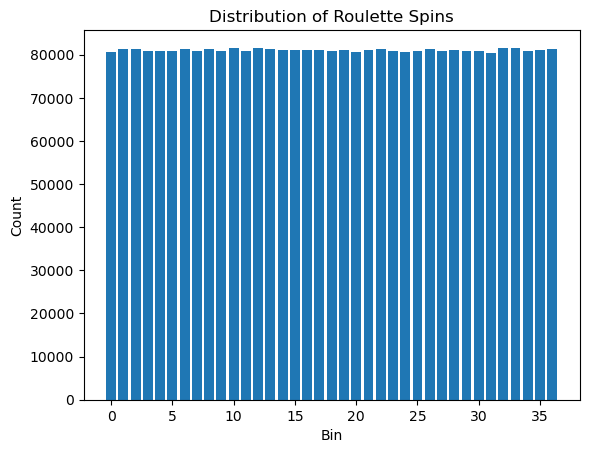

In [3]:
plt.bar(range(37), nums)
plt.xlabel('Bin')
plt.ylabel('Count')
plt.title('Distribution of Roulette Spins')
plt.show()

In [4]:
from scipy.stats import chi2_contingency

print("Our hypothesis is that the distribution of spins is uniform.")

total_observed = np.sum(nums)
num_bins = len(nums)
expected_frequency = total_observed / num_bins
expected_frequencies = np.full(num_bins, expected_frequency)

print(f"Expected Frequency: {expected_frequency}")
print(f"Observed Frequencies: {nums}")

chi2_stat, p_value, dof, expected = chi2_contingency([nums, expected_frequencies])

alpha = 0.05
print(f"Chi2 Stat: {chi2_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. The data does not follow a uniform distribution.")
else:
    print("Accept the null hypothesis. The data follows a uniform distribution.")


Our hypothesis is that the distribution of spins is uniform.
Expected Frequency: 81081.08108108108
Observed Frequencies: [80747, 81447, 81233, 80810, 80985, 80942, 81388, 80951, 81438, 80982, 81587, 80898, 81513, 81405, 81002, 81202, 81097, 81020, 80816, 81179, 80716, 81113, 81280, 80775, 80623, 80884, 81357, 80968, 81086, 80943, 80809, 80335, 81638, 81550, 80919, 81084, 81278]
Chi2 Stat: 19.45492525449066
P-value: 0.9888829370782358
Accept the null hypothesis. The data follows a uniform distribution.


From this we can conclude that the model for the roulette wheel is fair as our P-value is very high.